#SQL

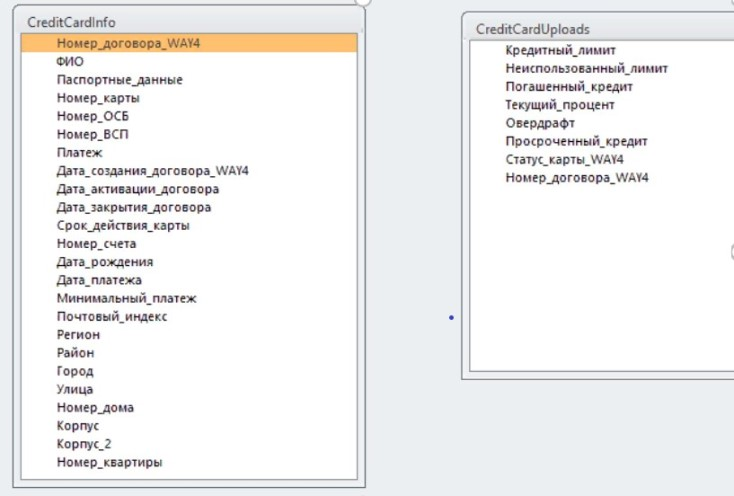

## 1
Найдите наибольший платеж по кредитной карте в разрезе ВСП. Формат вывода: ВСП, максимальный платёж. 

```sql
SELECT Номер_ВСП, MAX(Платеж)
FROM CreditCardInfo
GROUP BY Номер_ВСП
```

##2
Вывести следующую информацию по всем кредитным картам: ФИО, номер карты, кредитный лимит для тех записей, где будет совпадать номер договора WAY4. 



```sql
SELECT ФИО, Номер_карты, ccu.Кредитный_лимит
FROM CreditCardInfo AS cci
JOIN CreditCardUploads AS ccu ON ccu.Номер_договора_WAY4=cci.Номер_договора_WAY4
```

##3
Вывести все кредитные карты того ВСП, в котором обслуживается клиент с паспортными данными «12 34 567890».  

 


```sql
SELECT Номер_карты
FROM CreditCardInfo
WHERE Номер_ВСП IN 
                    (SELECT Номер_ВСП 
                     FROM CreditCardInfo
                     WHERE Паспортные_данные = '12 34 567890')


```

##4
Необходимо разработать код хранимой процедуры\функции, которая при передаче в нее текущей отчетной даты будет возвращать в табличном режиме значения текущей даты и дат предыдущих 3 недель. 

call test ('2013-03-06')--вызов отчетной даты 

```sql

CREATE PROCEDURE call_test @Date DATE
AS 

WITH dates(dt) as

(SELECT  @Date
UNION ALL
SELECT DATE(t.dt,'-7 day') AS dt FROM dates t
LIMIT 4
)

SELECT strftime('%Y-%m-%d', dt) FROM dates

GO; 

```